## COMP0041 Applied Computational Finance

Summer Assessment (80%) <br>
Date: 09/05/2022 <br>
Candidate: QYFB3 

## Question 1

In [3]:
# Part (a)
a = 2,3,4
a.append(5)

AttributeError: 'tuple' object has no attribute 'append'

In [9]:
# Part (b)
def angles():
    print('This function converts degrees to radians.')
    
    degree = float(input('Please enter the value of degrees to be converted: '))
    
    radian = (degree*(22/7))/180
    
    print('Angle in radians: ', radian)

In [10]:
angles()

This function converts degrees to radians.
Please enter the value of degrees to be converted: 218
Angle in radians:  3.806349206349206


In [30]:
# Part (c)
def product():
    # This function computes the product of 2^n, for n=1,...,N
    
    N = int(input('Please enter a positive integer: '))
    
    prod = 1
    for n in range(1,N+1):
        prod *= 2**n
    
    print('The total is: ', prod)

In [31]:
product()

Please enter a positive integer: 5
The total is:  32768


Text(1, 6, 'Positive Exponential')

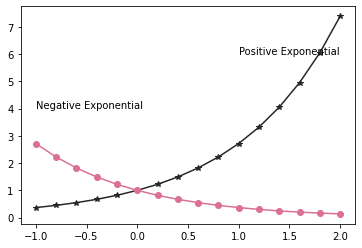

In [47]:
# Part (d)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,2,16)
y1 = np.exp(x)
y2 = np.exp(-x)

plt.plot(x,y1,color='0.15',marker='*')
plt.plot(x,y2,color='palevioletred', marker='o')

plt.text(-1,4,'Negative Exponential')
plt.text(1,6,'Positive Exponential')

#plt.savefig('C:\Users\BoJo\Desktop\Q1d.pdf')

## Question 2 

In [49]:
# Part (a)
import numpy as np
import numpy.random as npr

U = npr.rand(10000)
x = np.pi*U
func = np.sin(x)
area = np.pi*np.mean(func)
print(area)

2.010674907412324


In [73]:
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):
    
    # Set the random seed for reproducibility
    # Same seed leads to the same set of random values
    #np.random.seed(786) 

    # Read parameters
    S0 = s0         # initial spot level
    r = mu          # mu = rf in risk neutral framework 
    t0 = 0
    T = horizon     # time horizion
    t = timesteps   # number of time steps
    n = n_sims      # number of simulation
    
    # Define dt
    dt = T/t        # length of time interval  
    
    # Simulating 'n' asset price paths with 't' timesteps
    S = np.zeros((t, n))
    S[0] = S0

    for i in range(0, t-1):
        phi = np.random.standard_normal(n)                                                   # psuedo random numbers
        #S[i+1] = S[i] * (1 + r * dt + sigma * sqrt(dt) * phi)                            # vectorized operation per timesteps
        S[i+1] = S[i] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * phi)         # alternate form
       # print(S)
        
    return S

In [77]:
# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 1000, 100000)

# Define parameters
r = 0.05; T = 1; t0=0

# =======================
# Arithmetic 
# =======================

# Arithmetic average price
A = S.mean(axis=0) 

A_call_ = np.exp(-r*(T-t0)) * np.mean(np.maximum(S[-1] - A, 0))

print(A_call_)

5.843445273339108
